In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
email_data = pd.read_csv("http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv")
email_data.head(3)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0


In [5]:
male_df = email_data[email_data["segment"] != "Womens E-Mail"]
male_df["treatment"] = male_df["segment"].map(lambda x: 1 if x == "Mens E-Mail" else 0)
male_df.head(3)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,1


In [6]:
treatment_data = male_df[male_df["treatment"] == 1]
control_data = male_df[male_df["treatment"] == 0]

treatment_biased = treatment_data.drop(treatment_data[(
    (treatment_data['history'] > 300) |
    (treatment_data['recency'] < 6) |
    (treatment_data['recency'] == 'Multichannel')
) == False].sample(frac=0.5, random_state=1).index)

control_biased = control_data.drop(control_data[
    (control_data['history'] > 300) |
    (control_data['recency'] < 6) |
    (control_data['recency'] == 'Multichannel')
].sample(frac=0.5, random_state=1).index)

biased_data = pd.concat([treatment_biased, control_biased], axis=0)
biased_data.head(3)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,1
13,2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0.0,1


In [7]:
import statsmodels.formula.api as smf

In [8]:
biased_reg = smf.ols(
    data=biased_data,
    formula="spend ~ treatment + history",
).fit()

In [9]:
biased_reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3718,0.149,2.496,0.013,0.080,0.664
treatment,0.8342,0.181,4.616,0.000,0.480,1.188
history,0.0013,0.000,3.669,0.000,0.001,0.002


In [10]:
rct_reg = smf.ols(
    data=male_df,
    formula="spend ~ treatment",
).fit()

rct_reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6528,0.103,6.356,0.000,0.451,0.854
treatment,0.7698,0.145,5.300,0.000,0.485,1.055


In [11]:
nonrct_reg = smf.ols(
    data=biased_data,
    formula="spend ~ treatment",
).fit()

nonrct_reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6346,0.131,4.856,0.000,0.378,0.891
treatment,0.9261,0.179,5.174,0.000,0.575,1.277


In [12]:
nonrct_mreg = smf.ols(
    data=biased_data,
    formula="spend ~ treatment + history + channel + recency",
).fit()

nonrct_mreg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2596,0.389,0.667,0.505,-0.503,1.023
channel[T.Phone],0.3854,0.315,1.225,0.221,-0.231,1.002
channel[T.Web],0.5524,0.314,1.759,0.079,-0.063,1.168
treatment,0.7642,0.185,4.129,0.000,0.401,1.127
history,0.0014,0.000,3.538,0.000,0.001,0.002
recency,-0.0498,0.027,-1.851,0.064,-0.102,0.003


In [13]:
models = {
    "model_1":smf.ols(data=biased_data, formula="spend ~ treatment + recency + channel"),
    "model_2":smf.ols(data=biased_data, formula="spend ~ treatment + recency + channel + history"),
    "model_3":smf.ols(data=biased_data, formula="history ~ treatment + recency + channel"),
}

results = {}
for name, model in models.items():
    results[name] = model.fit()

In [14]:
OVB = results["model_2"].params["history"] * results["model_3"].params["treatment"]
coef_gap = results["model_1"].params["treatment"] - results["model_2"].params["treatment"]
print(f"OVB={OVB:.4f}, coef_gap={coef_gap:.4f}")

OVB=0.0475, coef_gap=0.0475


In [15]:
corr_visit_treatment = smf.ols(
    data=biased_data,
    formula="treatment ~ visit + channel + recency + history",
).fit()

corr_visit_treatment.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6697,0.011,60.144,0.000,0.648,0.692
channel[T.Phone],-0.0221,0.009,-2.334,0.020,-0.041,-0.004
channel[T.Web],-0.0247,0.009,-2.612,0.009,-0.043,-0.006
visit,0.1478,0.008,19.417,0.000,0.133,0.163
recency,-0.0300,0.001,-37.790,0.000,-0.032,-0.028
history,0.0001,1.17e-05,12.113,0.000,0.000,0.000


In [16]:
bad_control_reg = smf.ols(
    data=biased_data,
    formula="spend ~ treatment + visit + channel + recency + history",
).fit()

bad_control_reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.7260,0.385,-1.884,0.060,-1.481,0.029
channel[T.Phone],0.5023,0.310,1.619,0.106,-0.106,1.111
channel[T.Web],0.4331,0.310,1.398,0.162,-0.174,1.040
treatment,0.1682,0.184,0.916,0.359,-0.192,0.528
visit,7.5465,0.251,30.044,0.000,7.054,8.039
recency,0.0025,0.027,0.094,0.925,-0.050,0.055
history,0.0009,0.000,2.357,0.018,0.000,0.002


In [31]:
import rdata

In [32]:
parsed = rdata.parser.parse_file("../input/vouchers.rda")
converted = rdata.conversion.convert(parsed)
vouchers = converted["vouchers"]
vouchers.head(3)

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,NaN,12.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,0.0,0.0,NaN,13.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
vouchers.columns

Index(['ID', 'BOG95SMP', 'BOG97SMP', 'JAM93SMP', 'SEX', 'AGE', 'AGE2',
       'HSVISIT', 'SCYFNSH', 'INSCHL', 'PRSCH_C', 'PRSCHA_1', 'PRSCHA_2',
       'VOUCH0', 'BOG95ASD', 'BOG97ASD', 'JAM93ASD', 'DBOGOTA', 'DJAMUNDI',
       'D1995', 'D1997', 'RESPONSE', 'TEST_TAK', 'SEX_NAME', 'SVY', 'D1993',
       'PHONE', 'DAREA1', 'DAREA2', 'DAREA3', 'DAREA4', 'DAREA5', 'DAREA6',
       'DAREA7', 'DAREA8', 'DAREA9', 'DAREA10', 'DAREA11', 'DAREA12',
       'DAREA13', 'DAREA14', 'DAREA15', 'DAREA16', 'DAREA17', 'DAREA18',
       'DAREA19', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5',
       'DMONTH6', 'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11',
       'DMONTH12', 'BOG95', 'BOG97', 'MOM_SCH', 'MOM_AGE', 'MOM_MW', 'DAD_SCH',
       'DAD_AGE', 'DAD_MW', 'SEX2', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4',
       'STRATA5', 'STRATA6', 'STRATAMS', 'REPT6', 'TOTSCYRS', 'HASCHILD',
       'MARRIED', 'WORKING', 'REPT', 'NREPT', 'FINISH6', 'FINISH7', 'FINISH8',
       'SEX_MISS', 'US

In [34]:
formula_x_base = "VOUCH0"

formula_x_covariate = """
    SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + 
    STRATA4 + STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 + 
    DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 + DMONTH7 + 
    DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2
"""

formula_y = [
    "TOTSCYRS", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1", "FINISH6",
    "FINISH7", "FINISH8", "REPT6", "REPT", "NREPT", "MARRIED","HASCHILD",
    "HOURSUM", "WORKING3"
]

In [35]:
print(vouchers["TAB3SMPL"].unique())
print(vouchers['BOG95SMP'].unique())

[nan  1.]
[0. 1.]


In [36]:
regression_data = vouchers[(vouchers["TAB3SMPL"] == 1) & (vouchers['BOG95SMP'] == 1)]
regression_data.head(3)

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
3,3.0,1.0,0.0,0.0,0.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1.0,0.0,0.0,1.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,5.0,1.0,0.0,0.0,0.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
models = {}
for y in formula_y:
    model = smf.ols(
        data=regression_data,
        formula=f"{y} ~ {formula_x_base}"
    )
    
    models[y] = model.fit()  

In [54]:
def get_model_results(models, model_suffix="base"):
    columns= ['model_idx', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
    results= pd.DataFrame(columns=columns)

    for idx, val in models.items():
        result = pd.DataFrame(
            val.summary().tables[1].data[1:], 
            columns=val.summary().tables[1].data[0]
        )
        result["model_idx"] = idx + "_" + model_suffix
        results = results.append(result[result[''] == "VOUCH0"][columns])
        
    return results.reset_index(drop=True)

In [55]:
import numpy as np

model_results = get_model_results(models)
model_results['coef'] = model_results['coef'].astype(np.float32)
model_results = model_results.dropna()
model_results

,model_idx,coef,std err,t,P>|t|,[0.025,0.975]
0,TOTSCYRS_base,0.0581,0.052,1.110,0.267,-0.045,0.161
1,INSCHL_base,0.0186,0.022,0.860,0.390,-0.024,0.061
2,PRSCH_C_base,0.1600,0.028,5.655,0.000,0.104,0.216
3,USNGSCH_base,0.5089,0.023,22.107,0.000,0.464,0.554
4,PRSCHA_1_base,0.0629,0.017,3.731,0.000,0.030,0.096
5,FINISH6_base,0.0262,0.012,2.173,0.030,0.003,0.050
6,FINISH7_base,0.0402,0.020,2.009,0.045,0.001,0.079
7,FINISH8_base,0.1119,0.027,4.119,0.000,0.059,0.165
8,REPT6_base,-0.0657,0.024,-2.709,0.007,-0.113,-0.018
9,REPT_base,-0.0601,0.023,-2.581,0.010,-0.106,-0.014


In [56]:
models_with_cov = {}
for y in formula_y:
    model = smf.ols(
        data=regression_data,
        formula=f"{y} ~ {formula_x_base} + {formula_x_covariate}"
    )
    
    models_with_cov[y] = model.fit()  

In [57]:
models_with_cov_results = get_model_results(models_with_cov, model_suffix="covariate")
models_with_cov_results['coef'] = models_with_cov_results['coef'].astype(np.float32)
models_with_cov_results = models_with_cov_results.dropna()
models_with_cov_results

,model_idx,coef,std err,t,P>|t|,[0.025,0.975]
0,TOTSCYRS_covariate,0.0337,0.051,0.661,0.509,-0.066,0.134
1,INSCHL_covariate,0.0069,0.020,0.340,0.734,-0.033,0.047
2,PRSCH_C_covariate,0.1533,0.028,5.520,0.000,0.099,0.208
3,USNGSCH_covariate,0.5042,0.023,22.007,0.000,0.459,0.549
4,PRSCHA_1_covariate,0.0574,0.017,3.385,0.001,0.024,0.091
5,FINISH6_covariate,0.0229,0.012,1.910,0.056,-0.001,0.047
6,FINISH7_covariate,0.0307,0.020,1.557,0.120,-0.008,0.070
7,FINISH8_covariate,0.1002,0.027,3.715,0.000,0.047,0.153
8,REPT6_covariate,-0.0594,0.025,-2.417,0.016,-0.108,-0.011
9,REPT_covariate,-0.0548,0.024,-2.328,0.020,-0.101,-0.009


In [ ]:
pd.concat(
    [
        model_results[model_results['model_idx'] == 'PRSCHA_1_base'], 
        models_with_cov_results[models_with_cov_results['model_idx'] == 'PRSCHA_1_covariate'], 
        model_results[model_results['model_idx'] == 'USNGSCH_base'], 
        models_with_cov_results[models_with_cov_results['model_idx'] == 'USNGSCH_covariate'],
    ]
)

In [ ]:
display_features = [
    'FINISH6_covariate', 'FINISH7_covariate', 
    'FINISH8_covariate', 'INSCHL_covariate', 
    'NREPT_covariate', 'PRSCH_C_covariate', 
    'REPT_covariate', 'REPT6_covariate'
]

models_with_cov_results = models_with_cov_results[models_with_cov_results['model_idx'].isin(display_features)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

ax = sns.pointplot(
    data=models_with_cov_results, 
    x='model_idx', 
    y='coef',
    linestyles=''
)

ax.errorbar(
    models_with_cov_results['model_idx'], 
    models_with_cov_results['coef'], 
    yerr=models_with_cov_results['std err'].astype(np.float32)*1.96,
    linestyle=''
)

ax.axhline([0], ls=':', color='black')
plt.grid()
plt.xticks(rotation=30)
plt.show()

In [ ]:
data_tbl4_bog95 = vouchers[
    (vouchers['BOG95SMP'] == 1) &
    (vouchers['TAB3SMPL'] == 1) &
    (vouchers['SCYFNSH'].isnull() == False) &
    (vouchers['FINISH6'].isnull() == False) &
    (vouchers['PRSCHA_1'].isnull() == False) &
    (vouchers['REPT6'].isnull() == False) &
    (vouchers['NREPT'].isnull() == False) &
    (vouchers['INSCHL'].isnull() == False) &
    (vouchers['FINISH7'].isnull() == False) &
    (vouchers['PRSCH_C'].isnull() == False) &
    (vouchers['FINISH8'].isnull() == False) &
    (vouchers['PRSCHA_2'].isnull() == False) &
    (vouchers['TOTSCYRS'].isnull() == False) &
    (vouchers['REPT'].isnull() == False)
][[
    'VOUCH0', 'SVY', 'HSVISIT', 'DJAMUNDI', 'PHONE', 'AGE', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4', 'STRATA5', 'STRATA6', 
    'STRATAMS', 'DBOGOTA', 'D1993', 'D1995', 'D1997', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5', 'DMONTH6', 'DMONTH7', 
    'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11', 'DMONTH12', 'SEX_MISS', 'FINISH6', 'FINISH7', 'FINISH8', 'REPT6', 'REPT', 'NREPT', 
    'SEX2', 'TOTSCYRS', 'MARRIED', 'HASCHILD', 'HOURSUM', 'WORKING3', 'INSCHL', 'PRSCH_C', 'USNGSCH', 'PRSCHA_1'
]]

data_tbl4_bog95.head(3)

In [ ]:
regression_data = data_tbl4_bog95[data_tbl4_bog95['SEX2'] == 0]

models_with_cov = {}
for y in formula_y:
    model = smf.ols(formula='{} ~ {} + {}'.format(y, formula_x_base, formula_x_covariate), data=regression_data)
    models_with_cov[y] = model.fit()

In [ ]:
df_results_female = get_model_results(models_with_cov, 'covariate')
df_results_female['coef'] = df_results_female['coef'].astype(np.float32)
df_results_female = df_results_female.dropna()
df_results_female

In [ ]:
regression_data = data_tbl4_bog95[data_tbl4_bog95['SEX2'] == 1]

models_with_cov = {}
for y in formula_y:
    model = smf.ols(formula='{} ~ {} + {}'.format(y, formula_x_base, formula_x_covariate), data=regression_data)
    models_with_cov[y] = model.fit()

In [ ]:
df_results_male = get_model_results(models_with_cov, 'covariate')
df_results_male['coef'] = df_results_male['coef'].astype(np.float32)
df_results_male = df_results_male.dropna()
df_results_male

In [ ]:
df_results_male['sex'] = 'male'
df_results_female['sex'] = 'female'

df_results_concat = pd.concat([df_results_male, df_results_female])

In [ ]:
plt.figure(figsize=(15, 5))

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['model_idx'], 
        df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['coef'], 
        yerr=df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
display_features = ['FINISH6_covariate', 'FINISH7_covariate', 'FINISH8_covariate', 'INSCHL_covariate', 'NREPT_covariate',
                    'PRSCH_C_covariate', 'REPT_covariate', 'REPT6_covariate', 'TOTSCYRS_covariate']

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(display_features)],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(display_features)]['model_idx'], 
        df[df['model_idx'].isin(display_features)]['coef'], 
        yerr=df[df['model_idx'].isin(display_features)]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
display_features = ['HOURSUM_covariate']

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(display_features)],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(display_features)]['model_idx'], 
        df[df['model_idx'].isin(display_features)]['coef'], 
        yerr=df[df['model_idx'].isin(display_features)]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()

,model_idx,coef,std err,t,P>|t|,[0.025,0.975]
4,PRSCHA_1_base,0.0629,0.017,3.731,0.000,0.030,0.096
4,PRSCHA_1_covariate,0.0574,0.017,3.385,0.001,0.024,0.091
3,USNGSCH_base,0.5089,0.023,22.107,0.000,0.464,0.554
3,USNGSCH_covariate,0.5042,0.023,22.007,0.000,0.459,0.549


In [61]:
display_features = [
    'FINISH6_covariate', 'FINISH7_covariate', 
    'FINISH8_covariate', 'INSCHL_covariate', 
    'NREPT_covariate', 'PRSCH_C_covariate', 
    'REPT_covariate', 'REPT6_covariate'
]

models_with_cov_results = models_with_cov_results[models_with_cov_results['model_idx'].isin(display_features)]

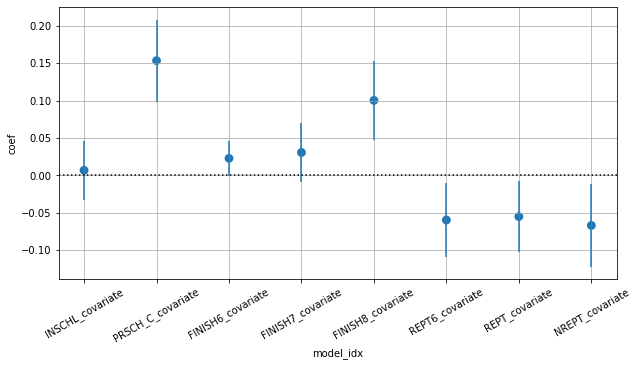

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

ax = sns.pointplot(
    data=models_with_cov_results, 
    x='model_idx', 
    y='coef',
    linestyles=''
)

ax.errorbar(
    models_with_cov_results['model_idx'], 
    models_with_cov_results['coef'], 
    yerr=models_with_cov_results['std err'].astype(np.float32)*1.96,
    linestyle=''
)

ax.axhline([0], ls=':', color='black')
plt.grid()
plt.xticks(rotation=30)
plt.show()

In [68]:
data_tbl4_bog95 = vouchers[
    (vouchers['BOG95SMP'] == 1) &
    (vouchers['TAB3SMPL'] == 1) &
    (vouchers['SCYFNSH'].isnull() == False) &
    (vouchers['FINISH6'].isnull() == False) &
    (vouchers['PRSCHA_1'].isnull() == False) &
    (vouchers['REPT6'].isnull() == False) &
    (vouchers['NREPT'].isnull() == False) &
    (vouchers['INSCHL'].isnull() == False) &
    (vouchers['FINISH7'].isnull() == False) &
    (vouchers['PRSCH_C'].isnull() == False) &
    (vouchers['FINISH8'].isnull() == False) &
    (vouchers['PRSCHA_2'].isnull() == False) &
    (vouchers['TOTSCYRS'].isnull() == False) &
    (vouchers['REPT'].isnull() == False)
][[
    'VOUCH0', 'SVY', 'HSVISIT', 'DJAMUNDI', 'PHONE', 'AGE', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4', 'STRATA5', 'STRATA6', 
    'STRATAMS', 'DBOGOTA', 'D1993', 'D1995', 'D1997', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5', 'DMONTH6', 'DMONTH7', 
    'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11', 'DMONTH12', 'SEX_MISS', 'FINISH6', 'FINISH7', 'FINISH8', 'REPT6', 'REPT', 'NREPT', 
    'SEX2', 'TOTSCYRS', 'MARRIED', 'HASCHILD', 'HOURSUM', 'WORKING3', 'INSCHL', 'PRSCH_C', 'USNGSCH', 'PRSCHA_1'
]]

data_tbl4_bog95.head(3)

,VOUCH0,SVY,HSVISIT,DJAMUNDI,PHONE,AGE,STRATA1,STRATA2,STRATA3,STRATA4,...,SEX2,TOTSCYRS,MARRIED,HASCHILD,HOURSUM,WORKING3,INSCHL,PRSCH_C,USNGSCH,PRSCHA_1
3,1.0,0.0,0.0,0.0,1.0,14.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,14.0,0.0,1.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [69]:
regression_data = data_tbl4_bog95[data_tbl4_bog95['SEX2'] == 0]

models_with_cov = {}
for y in formula_y:
    model = smf.ols(formula='{} ~ {} + {}'.format(y, formula_x_base, formula_x_covariate), data=regression_data)
    models_with_cov[y] = model.fit()

In [70]:
df_results_female = get_model_results(models_with_cov, 'covariate')
df_results_female['coef'] = df_results_female['coef'].astype(np.float32)
df_results_female = df_results_female.dropna()
df_results_female

,model_idx,coef,std err,t,P>|t|,[0.025,0.975]
0,TOTSCYRS_covariate,0.0909,0.066,1.381,0.168,-0.038,0.220
1,INSCHL_covariate,0.0347,0.028,1.237,0.217,-0.020,0.090
2,PRSCH_C_covariate,0.1711,0.039,4.337,0.000,0.094,0.249
3,USNGSCH_covariate,0.5436,0.032,16.992,0.000,0.481,0.606
4,PRSCHA_1_covariate,0.0229,0.023,1.011,0.312,-0.022,0.067
5,FINISH6_covariate,0.0317,0.014,2.281,0.023,0.004,0.059
6,FINISH7_covariate,0.0411,0.025,1.626,0.105,-0.009,0.091
7,FINISH8_covariate,0.1047,0.037,2.865,0.004,0.033,0.177
8,REPT6_covariate,-0.0362,0.031,-1.155,0.249,-0.098,0.025
9,REPT_covariate,-0.0290,0.032,-0.901,0.368,-0.092,0.034


In [71]:
regression_data = data_tbl4_bog95[data_tbl4_bog95['SEX2'] == 1]

models_with_cov = {}
for y in formula_y:
    model = smf.ols(formula='{} ~ {} + {}'.format(y, formula_x_base, formula_x_covariate), data=regression_data)
    models_with_cov[y] = model.fit()

In [72]:
df_results_male = get_model_results(models_with_cov, 'covariate')
df_results_male['coef'] = df_results_male['coef'].astype(np.float32)
df_results_male = df_results_male.dropna()
df_results_male

,model_idx,coef,std err,t,P>|t|,[0.025,0.975]
0,TOTSCYRS_covariate,-0.0286,0.078,-0.366,0.714,-0.182,0.125
1,INSCHL_covariate,-0.0195,0.030,-0.658,0.511,-0.078,0.039
2,PRSCH_C_covariate,0.1363,0.040,3.433,0.001,0.058,0.214
3,USNGSCH_covariate,0.4677,0.033,14.159,0.000,0.403,0.533
4,PRSCHA_1_covariate,0.0902,0.025,3.555,0.000,0.040,0.140
5,FINISH6_covariate,0.0144,0.020,0.734,0.463,-0.024,0.053
6,FINISH7_covariate,0.0264,0.031,0.866,0.387,-0.034,0.086
7,FINISH8_covariate,0.0950,0.040,2.368,0.018,0.016,0.174
8,REPT6_covariate,-0.0866,0.038,-2.266,0.024,-0.162,-0.012
9,REPT_covariate,-0.0830,0.035,-2.406,0.016,-0.151,-0.015


In [73]:
df_results_male['sex'] = 'male'
df_results_female['sex'] = 'female'

df_results_concat = pd.concat([df_results_male, df_results_female])

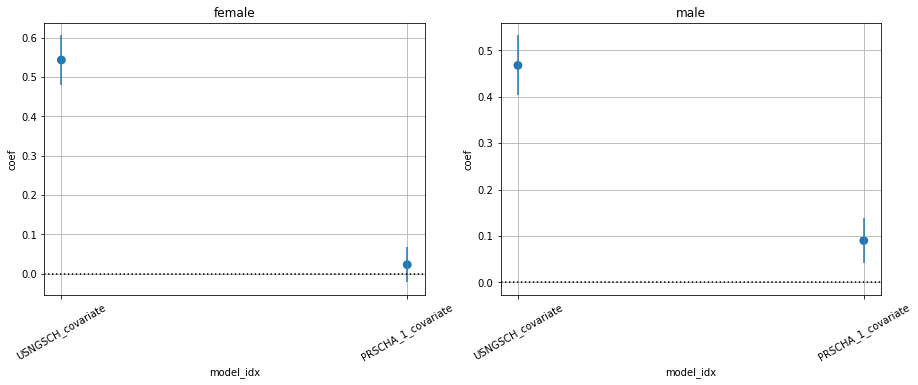

In [74]:
plt.figure(figsize=(15, 5))

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['model_idx'], 
        df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['coef'], 
        yerr=df[df['model_idx'].isin(['PRSCHA_1_covariate', 'USNGSCH_covariate'])]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()

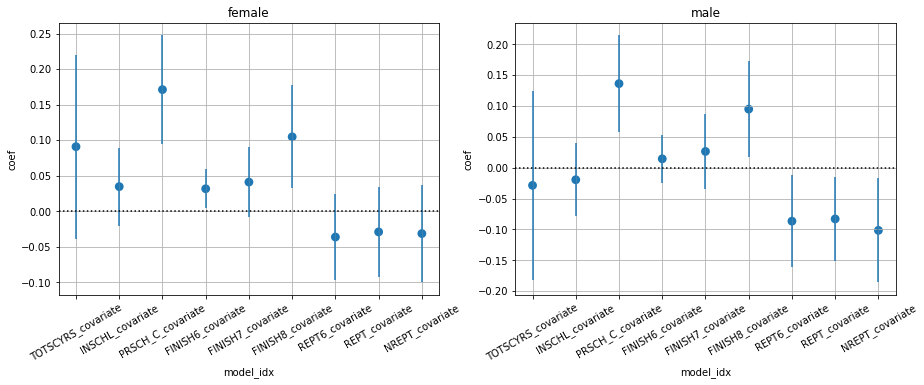

In [75]:
plt.figure(figsize=(15, 5))
display_features = ['FINISH6_covariate', 'FINISH7_covariate', 'FINISH8_covariate', 'INSCHL_covariate', 'NREPT_covariate',
                    'PRSCH_C_covariate', 'REPT_covariate', 'REPT6_covariate', 'TOTSCYRS_covariate']

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(display_features)],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(display_features)]['model_idx'], 
        df[df['model_idx'].isin(display_features)]['coef'], 
        yerr=df[df['model_idx'].isin(display_features)]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()

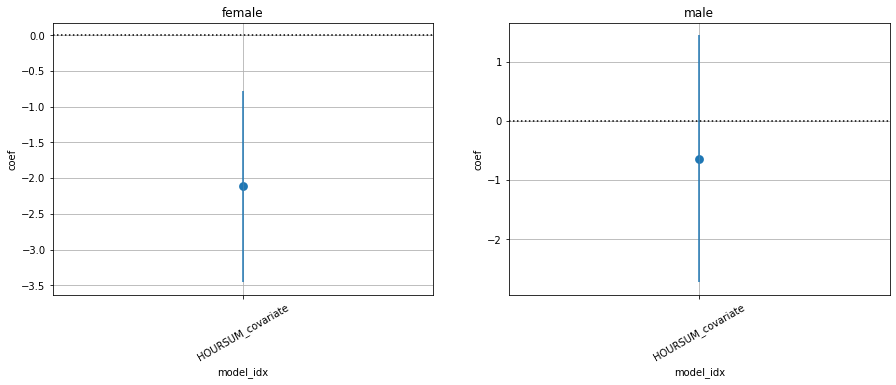

In [76]:
plt.figure(figsize=(15, 5))
display_features = ['HOURSUM_covariate']

for i, df, label in zip([1, 2], [df_results_female, df_results_male], ['female', 'male']):
    plt.subplot(1, 2, i)
    
    ax = sns.pointplot(
        data=df[df['model_idx'].isin(display_features)],
        x='model_idx', 
        y='coef',
        dodge=True,
        linestyles=''
    )

    ax.errorbar(
        df[df['model_idx'].isin(display_features)]['model_idx'], 
        df[df['model_idx'].isin(display_features)]['coef'], 
        yerr=df[df['model_idx'].isin(display_features)]['std err'].astype(np.float32)*1.96,
        linestyle=''
    )

    ax.axhline([0], ls=':', color='black')
    plt.grid()
    plt.title(label)
    plt.xticks(rotation=30)
plt.show()